# Shopping Behavior Exploratory Data Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Wrangling](#data-wrangling)
        - [Cleaning Headers](#cleaning-headers)
        - [Cleaning Column Elements](#cleaning-column-elements)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

[project intro]

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('shopping_behavior_updated.csv', sep=',')
except:
    df = pd.read_csv('/datasets/shopping_behavior_updated.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-Processing Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [5]:
# Checking for null values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [6]:
# Removing columns we do not need for this analysis
# Customer Id values are the same as the index value
# Frequency of Purchases value is vary similar to the previous purchases column
df = df.drop(columns=['Customer ID', 'Promo Code Used', 'Frequency of Purchases'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3900 non-null   int64  
 1   Gender                 3900 non-null   object 
 2   Item Purchased         3900 non-null   object 
 3   Category               3900 non-null   object 
 4   Purchase Amount (USD)  3900 non-null   int64  
 5   Location               3900 non-null   object 
 6   Size                   3900 non-null   object 
 7   Color                  3900 non-null   object 
 8   Season                 3900 non-null   object 
 9   Review Rating          3900 non-null   float64
 10  Subscription Status    3900 non-null   object 
 11  Shipping Type          3900 non-null   object 
 12  Discount Applied       3900 non-null   object 
 13  Previous Purchases     3900 non-null   int64  
 14  Payment Method         3900 non-null   object 
dtypes: f

[Back to Table of Contents](#back)

### Data Wrangling

#### Cleaning Headers

In [7]:
#checking for snakecase format
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Previous Purchases', 'Payment Method'],
      dtype='object')

In [8]:
# Renaming column names to snake_case format
df = df.rename(columns={'Age': 'age',
                        'Gender': 'gender',
                        'Item Purchased': 'item_purchased',
                        'Category': 'category',
                        'Purchase Amount (USD)': 'usd_purchase_total',
                        'Location': 'location',
                        'Size': 'size',
                        'Color': 'color',
                        'Season': 'season',
                        'Review Rating': 'customer_rating',
                        'Subscription Status': 'sub_status',
                        'Shipping Type': 'shipping_type',
                        'Discount Applied': 'discount_applied',
                        'Previous Purchases': 'previous_orders',
                        'Payment Method': 'payment_method'})
df.columns

Index(['age', 'gender', 'item_purchased', 'category', 'usd_purchase_total',
       'location', 'size', 'color', 'season', 'customer_rating', 'sub_status',
       'shipping_type', 'discount_applied', 'previous_orders',
       'payment_method'],
      dtype='object')

[Back to Table of Contents](#back)

#### Cleaning Column Elements

In [9]:
df.head()

,age,gender,item_purchased,category,usd_purchase_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal


In [10]:
# Converting all elements into snakecase format, removing all nonlegible characters, and converting data types 
# to reduce data usage
def clean_col(col):
    col = col.lower()
    col = col.strip()
    col = col.rstrip()
    col = col.replace(' ', '_')
    col = col.replace('[^a-zA-Z0-9_]', '')
    return col

df['gender'] = df['gender'].apply(clean_col)
df['gender'] = df['gender'].astype('category')

df['item_purchased'] = df['item_purchased'].apply(clean_col)

df['category'] = df['category'].apply(clean_col)
df['category'] = df['category'].astype('category')

df['location'] = df['location'].apply(clean_col)

df['size'] = df['size'].apply(clean_col)
df['size'] = df['size'].astype('category')

df['color'] = df['color'].apply(clean_col)

df['season'] = df['season'].apply(clean_col)
df['season'] = df['season'].astype('category')

df['sub_status'] = df['sub_status'].apply(clean_col)
df['sub_status'] = df['sub_status'].astype('category')

df['shipping_type'] = df['shipping_type'].apply(clean_col)
df['shipping_type'] = df['shipping_type'].astype('category')
df['shipping_type'] = df['shipping_type'].replace('express', 'paid_shipping').replace('next day air', 'paid_shipping').replace('standard', 'paid_shipping').replace('2-day shipping', 'paid_shipping').replace('store pickup', 'free_shipping')

df['discount_applied'] = df['discount_applied'].apply(clean_col)
df['discount_applied'] = df['discount_applied'].astype('category')

df['payment_method'] = df['payment_method'].apply(clean_col)
df['payment_method'] = df['payment_method'].astype('category')
df['payment_method'] = df['payment_method'].replace('venmo', 'payment_service').replace('credit_card', 'credit_debit_card').replace('paypal', 'payment_service').replace('bank_transfer', 'cash').replace('debit_card', 'credit_debit_card')

df.head(5)

,age,gender,item_purchased,category,usd_purchase_total,location,size,color,season,customer_rating,sub_status,shipping_type,discount_applied,previous_orders,payment_method
0,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,paid_shipping,yes,14,payment_service
1,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,paid_shipping,yes,2,cash
2,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free_shipping,yes,23,credit_debit_card
3,21,male,sandals,footwear,90,rhode_island,m,maroon,spring,3.5,yes,next_day_air,yes,49,payment_service
4,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free_shipping,yes,31,payment_service


[Back to Table of Contents](#back)

## Exploratory Data Analysis

### Identifying Primary Customer Demographic

#### 1.1 Who are our main customer demographic?

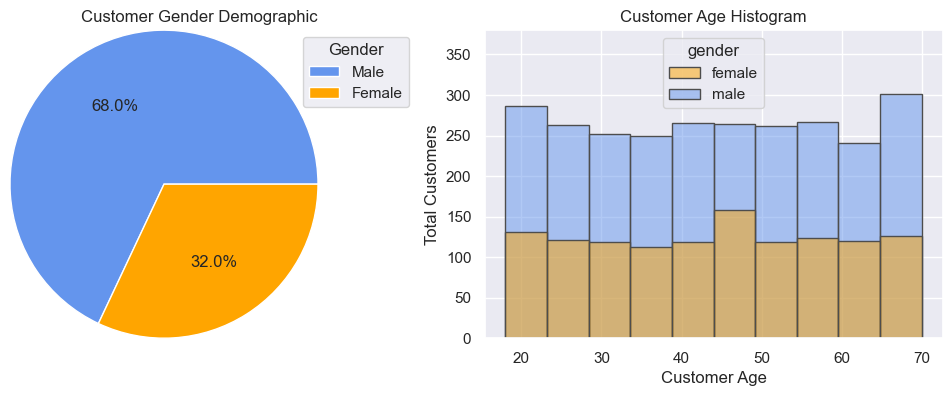

In [11]:
# Setting theme and figure size
sns.set_theme(style='darkgrid')
plt.figure(figsize=(13, 4))

# Since this is a fashion apparel business, the first key demographic characteristic is gender
# We need to find out if we cater to men, women, or both since products and marketing
# can vary depending on who is our main demographic.
plt.subplot(1, 2, 1)
df['gender'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 fontsize=12,
                                 label='',
                                 labels=['', ''],
                                 colors=['cornflowerblue', 'orange'],
                                 radius=1.25)
plt.title('Customer Gender Demographic', loc='right')
plt.legend(['Male', 'Female'],
           title='Gender',
           loc=[0.95,.75])

# Fashion apparel widely varies between age and gender groups. By getting a 
# histogram of customer age and gender will reveal a lot about our customer demographic. 
plt.subplot(1, 2, 2)
sns.histplot(data=df,
             x='age',
             hue='gender',
             palette=['orange', 'cornflowerblue'],
             edgecolor='0.3',
             bins=10)
plt.title('Customer Age Histogram')
plt.xlabel('Customer Age')
plt.ylabel('Total Customers')
plt.ylim(0, 380)
plt.show()

Observation:

-	About 2/3 of customers are male customers and 1/3 are female customers

-	This is an important factor because preferences in fashion apparel products can greatly differ between genders

-	The histogram shows that the largest age group of customers is 65-70 years old for men and 45–50-year-olds for women, however, customers overall are well diversified across all genders and age groups indicating that this fashion product can be marketed to all age groups regardless of age or gender

-	Specific customer groups that should be targeted are middle-aged customers who tend to be in or entering the prime of their careers and will usually have more disposable income to spend on amenities

-	The individual prime customer demographic is fashion apparel products catered more toward older men

[Back to Table of Contents](#back)

#### 1.2 Which states contain the largest population of customers?

In [12]:
# Creating a list to convert full state names to their abbreviated names
# For the Choropleth map to display a heatmap of customers in the US
us_state_to_abbrev = {'Alabama': 'AL',
                      'Alaska': 'AK',
                      'Arizona': 'AZ',
                      'Arkansas': 'AR',
                      'California': 'CA',
                      'Colorado': 'CO',
                      'Connecticut': 'CT',
                      'Delaware': 'DE',
                      'Florida': 'FL',
                      'Georgia': 'GA',
                      'Hawaii': 'HI',
                      'Idaho': 'ID',
                      'Illinois': 'IL',
                      'Indiana': 'IN',
                      'Iowa': 'IA',
                      'Kansas': 'KS',
                      'Kentucky': 'KY',
                      'Louisiana': 'LA',
                      'Maine': 'ME',
                      'Maryland': 'MD',
                      'Massachusetts': 'MA',
                      'Michigan': 'MI',
                      'Minnesota': 'MN',
                      'Mississippi': 'MS',
                      'Missouri': 'MO',
                      'Montana': 'MT',
                      'Nebraska': 'NE',
                      'Nevada': 'NV',
                      'New Hampshire': 'NH',
                      'New Jersey': 'NJ',
                      'New Mexico': 'NM',
                      'New York': 'NY',
                      'North Carolina': 'NC',
                      'North Dakota': 'ND',
                      'Ohio': 'OH',
                      'Oklahoma': 'OK',
                      'Oregon': 'OR',
                      'Pennsylvania': 'PA',
                      'Rhode Island': 'RI',
                      'South Carolina': 'SC',
                      'South Dakota': 'SD',
                      'Tennessee': 'TN',
                      'Texas': 'TX',
                      'Utah': 'UT',
                      'Vermont': 'VT',
                      'Virginia': 'VA',
                      'Washington': 'WA',
                      'West Virginia': 'WV',
                      'Wisconsin': 'WI',
                      'Wyoming': 'WY',
                      'District of Columbia': 'DC',
                      'Puerto Rico': 'PR'}

In [13]:
# Calculating the aggregate number of customers per state and turning the aggregate
# data into a DataFrame
state_count = df.groupby('location').agg({'gender': 'count'}).to_dict()
state_data = pd.DataFrame.from_dict(state_count)
# Giving the DataFrame an index and renaming the new columns
state_data.reset_index(inplace=True)
state_data.rename(columns={'index': 'state', 'gender': 'total_state_customers'}, inplace=True)
# Converting full state names to their abbreviations to match with the state data in the 
# Choropleth map to display a heatmap of US customers
state_data['state'] = state_data['state'].str.title()
state_data['state'] = state_data['state'].str.replace('_', ' ')
state_data['state'] = state_data['state'].replace(us_state_to_abbrev)

In [14]:
# Converting the abbreviated state values back to their full names for GeoPy
# to more accurately retrieve the state latitude and longitude values
states = {'AK': 'Alaska',
          'AL': 'Alabama',
          'AR': 'Arkansas',
          'AS': 'American Samoa',
          'AZ': 'Arizona',
          'CA': 'California',
          'CO': 'Colorado',
          'CT': 'Connecticut',
          'DC': 'District of Columbia',
          'DE': 'Delaware',
          'FL': 'Florida',
          'GA': 'Georgia',
          'GU': 'Guam',
          'HI': 'Hawaii',
          'IA': 'Iowa',
          'ID': 'Idaho',
          'IL': 'Illinois',
          'IN': 'Indiana',
          'KS': 'Kansas',
          'KY': 'Kentucky',
          'LA': 'Louisiana',
          'MA': 'Massachusetts',
          'MD': 'Maryland',
          'ME': 'Maine',
          'MI': 'Michigan',
          'MN': 'Minnesota',
          'MO': 'Missouri',
          'MP': 'Northern Mariana Islands',
          'MS': 'Mississippi',
          'MT': 'Montana',
          'NA': 'National',
          'NC': 'North Carolina',
          'ND': 'North Dakota',
          'NE': 'Nebraska',
          'NH': 'New Hampshire',
          'NJ': 'New Jersey',
          'NM': 'New Mexico',
          'NV': 'Nevada',
          'NY': 'New York',
          'OH': 'Ohio',
          'OK': 'Oklahoma',
          'OR': 'Oregon',
          'PA': 'Pennsylvania',
          'PR': 'Puerto Rico',
          'RI': 'Rhode Island',
          'SC': 'South Carolina',
          'SD': 'South Dakota',
          'TN': 'Tennessee',
          'TX': 'Texas',
          'UT': 'Utah',
          'VA': 'Virginia',
          'VI': 'Virgin Islands',
          'VT': 'Vermont',
          'WA': 'Washington',
          'WI': 'Wisconsin',
          'WV': 'West Virginia',
          'WY': 'Wyoming'}

In [15]:
# Creating a new DataFrame copy to use to create map markers and icons
map_icons = state_data.copy()
# New columns for GeoPy to get latitude and longitude 
map_icons['location_lat'] = ''
map_icons['location_long'] = ''
# Converting abbreviated state names to full state names for GeoPy to more accurately retrieve the
# latitude and longitude values
map_icons['state'] = map_icons['state'].replace(states)
# Renaming some states to help GeoPy find latitude and longitude more accurately
map_icons['state'] = map_icons['state'].replace('Washington', 'Washington State')
map_icons['state'] = map_icons['state'].replace('New York', 'New York State')
# Converting int column to a str column to map marker text
map_icons['total_state_customers'] = 'Total Customer: ' + map_icons['total_state_customers'].astype('str')

In [16]:
# Using GeoPy to pull latitude and longitude data for the map
geolocator = Nominatim(user_agent='myApp')

for i in map_icons.index:
    try:
        # GeoPy retrieving address from states
        location = geolocator.geocode(map_icons['state'][i])
        
        # Appending lat/long values to column using dataframe location
        map_icons.loc[i,'location_lat'] = location.latitude
        map_icons.loc[i,'location_long'] = location.longitude

    except:
        # Exception for the locations where no value is retrieved and 
        # appends null value to column
        map_icons.loc[i,'location_lat'] = ''
        map_icons.loc[i,'location_long'] = ''

map_icons

,state,total_state_customers,location_lat,location_long
0,Alabama,Total Customer: 89,33.258882,-86.829534
1,Alaska,Total Customer: 72,64.445961,-149.680909
2,Arizona,Total Customer: 65,34.395342,-111.763275
3,Arkansas,Total Customer: 79,35.204888,-92.447911
4,California,Total Customer: 95,36.701463,-118.755997
5,Colorado,Total Customer: 75,38.725178,-105.607716
6,Connecticut,Total Customer: 78,41.65002,-72.734216
7,Delaware,Total Customer: 86,38.692045,-75.401331
8,Florida,Total Customer: 68,27.756767,-81.463983
9,Georgia,Total Customer: 79,32.329381,-83.113737


In [17]:
# Converting DataFrame to list to be used in a loop for map
map_icons = map_icons.values.tolist()

In [18]:
# Creating folium map
us_map = folium.Map([43, -100], 
                    zoom_start=4,
                    font_size=15)

us_states = requests.get('https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json').json()

folium.Choropleth(geo_data=us_states,
                  data=state_data,
                  line_weight=1.5,
                  columns=['state', 'total_state_customers'],
                  key_on='feature.id',
                  fill_color='RdYlGn',
                  legend_name='Total Customers',
                  highlight=True).add_to(us_map)

# Loop to create map markers and circle markers
for col in map_icons:
    folium.Marker(location=[col[2], col[3]],
                  tooltip=col[0],
                  popup=col[1],
                  icon=folium.Icon(color='red',
                                    icon='info-sign')).add_to(us_map)
    
    folium.CircleMarker(location=[col[2], col[3]],
                        radius=10,
                        popup=col[0],
                        color='red',
                        fill_color='red').add_to(us_map)

us_map.save('us_map.html')
us_map

Observation:

- The results show Montana, Illinois, California, and Idaho are the largest states where many customers demographic reside from

- The marketing team should focus on increasing the customer count from the current top states since this business is still in the growing phase of the business cycle. Specifically, California and New York should be the primary markets to target since those are the largest markets compared to the other top states.

[Back to Table of Contents](#back)

#### 1.3 Which states contain the largest population for the target demographic for each gender?

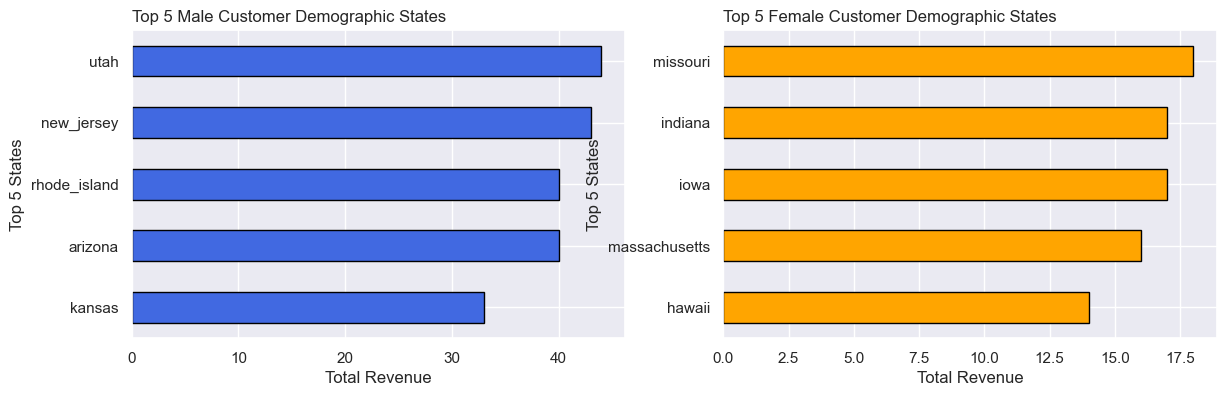

In [ ]:
# Setting figure size
plt.figure(figsize=(16, 4))

# It is also important to find which states has the largest demographic of male and female customers
# are from so we have the option to perform more targeted marketing since our male and female customers
# are widely different in age and cultural preferences.
# To find where are our male demographic are from we first filter the genders column to equale males
# and then we group the dataset by location and total the sum generated for those locations.
plt.subplot(1, 2, 1)
df[df['gender'] == 'male'].groupby('location')['gender'].count().sort_values().head(5).plot(kind='barh',
                                                                                            color='royalblue',
                                                                                            edgecolor='black')
plt.title('Top 5 Male Customer Demographic States',
          loc='left')
plt.xlabel('Total Revenue')
plt.ylabel('Top 5 States')

# Now we are looking for the states with the largest groups of our female customers
# To find where are our female demographic we filter the genders column to equal female
# and then we group the dataset by location and total the sum generated for those locations.
plt.subplot(1, 2, 2)
df[df['gender'] == 'female'].groupby('location')['gender'].count().sort_values().head(5).plot(kind='barh',
                                                                                              color='orange',
                                                                                              edgecolor='black')
plt.title('Top 5 Female Customer Demographic States',
          loc='left')
plt.xlabel('Total Revenue')
plt.ylabel('Top 5 States')
plt.show()

Observation:

-	The top 5 states in total male customers are California, Missouri, Alabama, Vermont, and New York

- The top 5 states in total female customers are Montana, Idaho, Texas, Georgia, and Kansas

-	This also tells us that our male and female demographic preferences can differ widely from state to state indicating that a targeted marketing effort could perform better than just a general marketing effort depending on the product

[Back to Table of Contents](#back)

### Customer Shopping Behavior

#### 2.1 Which products are the best sellers? In which size? Color?

In [ ]:
# Aggregating the revenue generated by items purchased, and converting the aggregate data into a DataFrame 
products_total_rev = df.groupby('item_purchased').agg({'usd_purchase_total': 'sum'}).to_dict()
product_rev_df = pd.DataFrame.from_dict(products_total_rev)
# Resetting the index and renaming the column headers
product_rev_df.reset_index(inplace=True)
product_rev_df.rename(columns={'index': 'product', 'usd_purchase_total': 'total_sales'}, inplace=True)

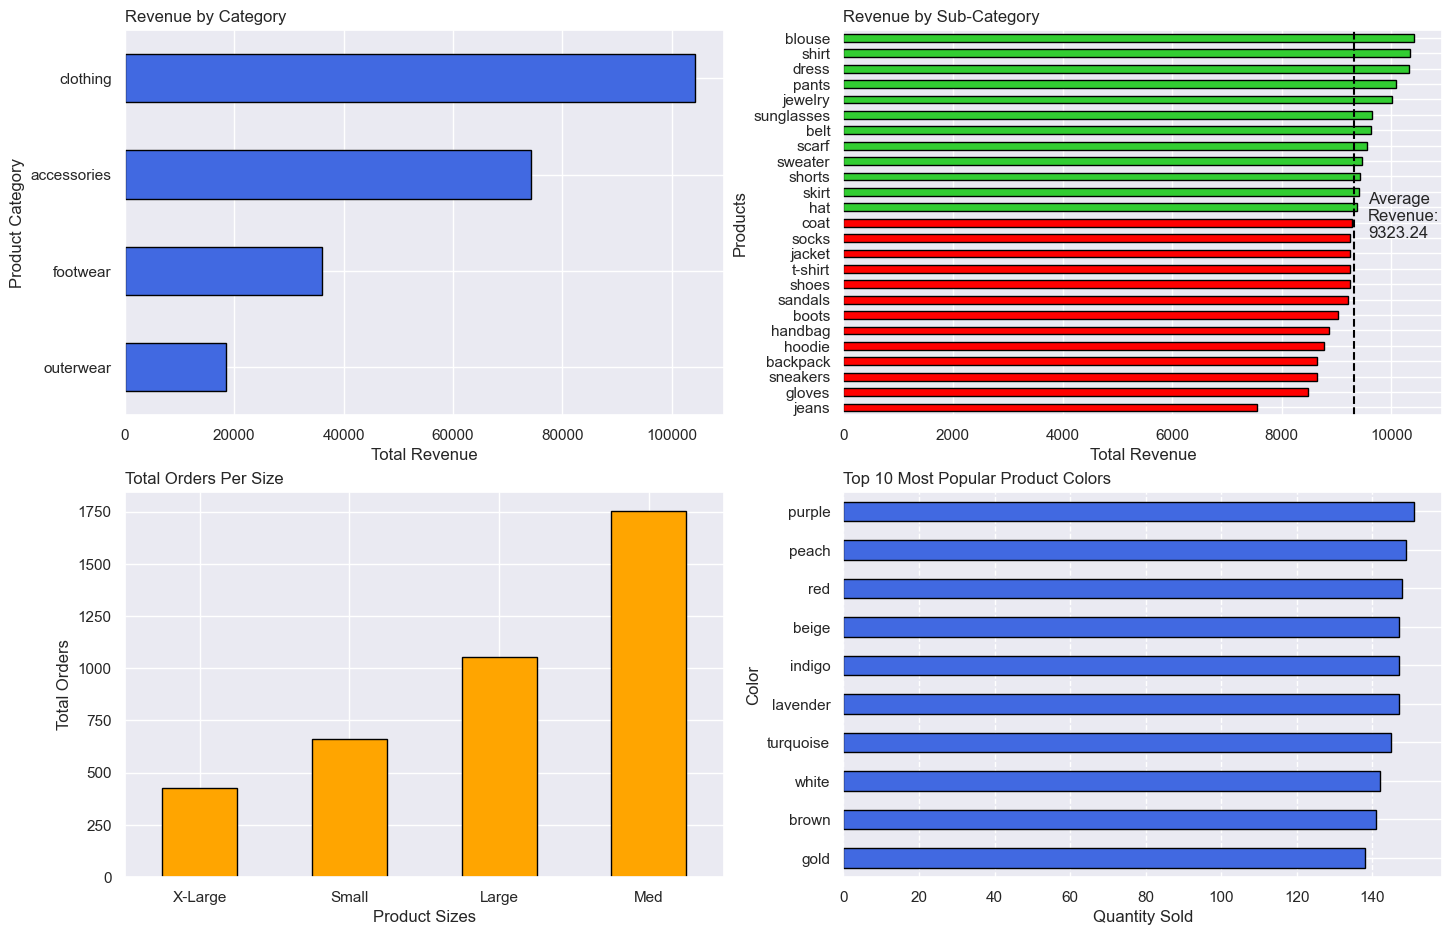

In [21]:
# Setting figure size
plt.figure(figsize=(17, 11))

# Now we need find the average customer rating for each product category to see which 
# category customers rate highly
plt.subplot(2, 2, 1)
df.groupby(['category'])['usd_purchase_total'].sum().sort_values().plot(kind='barh',
                                                                        color='royalblue',
                                                                        edgecolor='black')
plt.title('Revenue by Category', loc='left')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')

# To find the average customer rating for each product we need to group the item_purchased column, 
# find the mean of the customer_rating column, and plot the results. It would also be helpful to see 
# which items were rated higher and below average so I will include a line to represent the average 
# item rating and color coordinate items rated below and above average. 
plt.subplot(2, 2, 2)
product_rev = df.groupby(['item_purchased'])['usd_purchase_total'].sum().sort_values()
avg_rev = product_rev_df['total_sales'].mean()

col = []
for i in product_rev:
    if i >= avg_rev:
        col.append('limegreen')
    else:
        col.append('red')

product_rev.plot(kind='barh',
                     color=col,
                     edgecolor='black')
plt.title('Revenue by Sub-Category', loc='left')
plt.axvline(x=avg_rev, 
            color='black', 
            linestyle='--')
plt.text((avg_rev + 250), 11, f'Average\nRevenue:\n{avg_rev.round(2)}')
plt.xlabel('Total Revenue')
plt.ylabel('Products')

# If it is applicable, we should find which sizes are the most 
# popular sizes purchased by our customers. 
plt.subplot(2, 2, 3)
df['size'].value_counts().sort_values().plot(kind='bar',
                                             color='orange',
                                             edgecolor='black')
plt.title('Total Orders Per Size', loc='left')
plt.xlabel('Product Sizes')
plt.xticks([0, 1, 2, 3], ['X-Large', 'Small', 'Large', 'Med'], rotation=0)
plt.ylabel('Total Orders')

# It would be interesting to also see which colors are the most popular for items sold.
plt.subplot(2, 2, 4)
df['color'].value_counts().sort_values().head(10).plot(kind='barh',
                                                       color='royalblue',
                                                       edgecolor='black')
plt.title('Top 10 Most Popular Product Colors ', loc='left')
plt.grid(axis='x', linestyle='--')
plt.xlabel('Quantity Sold')
plt.ylabel('Color')
plt.show()

Observation:

- Based on the revenue generated the primary product category are clothing and accessories items

- Many top-selling products are basic fashion essentials and accessories indicating that this business has many strong foundational products that can be relied on for long-term revenue. Some customers may not return every season for unique trendy pieces but if they like essential pieces such as shirts and pants then a lot of customers are more likely to return to replace the same piece they bought before.

- The most common sizes are medium and large-sized items

- Most of the colors preferred by customers are cool or earthtone colors. This could provide inspiration for future product designs that produce products and designs that complement each other in outfits with cool tones.

#### 2.2 What is the customer sentiment about the business?

In [22]:
# Finding the range in which our products are rated by customers
df.agg({'customer_rating': ['min', 'mean', 'max']}).round(3)

,customer_rating
min,2.50
mean,3.75
max,5.00


Observation:

-	The lowest rating was 2.5/5, the highest rating was of 5/5, and the average overall rating, encompassing all products, was 3.7/5. 

-	Most customers are more likely to rate a negative review when rating a product. This signals to the business that the sold products were seen as average at worst, and perfect at best, which is a overall positive sign of market sentiment about the business and its products.

##### 2.3 What are the customer's prefered method of transaction?

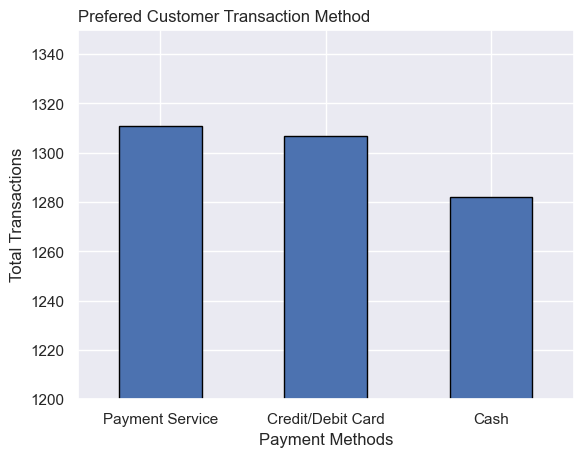

In [23]:
# To find the total number of users per payment method we can use value_counts on the 
# payment_method column

df['payment_method'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                      edgecolor='black')
plt.title('Prefered Customer Transaction Method', loc='left')
plt.xlabel('Payment Methods')
plt.xticks([0, 1, 2], ['Payment Service', 'Credit/Debit Card', 'Cash'], rotation=0)
plt.ylabel('Total Transactions')
plt.ylim([1200, 1350])
plt.show()

Observation:

-	Based on the data, shows that payment services are the most popular form of customer payment

-	For most e-commerce businesses, by increasing the variety of accepted payment services, the more likely new customers will purchase products

-	Currently, accepted payment services are Venmo and PayPal, if payment services can expand to other popular payment services like Cash App, Apple Pay, Google Pay, and Amazon Pay, then new customers are more likely to shop at this business due to increased customer conveniency

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

syntax:
[Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [Kaggle](URL of the dataset).

example:
Tatman, R. (2017, November). R vs. Python: The Kitchen Gadget Test, Version 1. Retrieved December 20, 2017 from https://www.kaggle.com/rtatman/r-vs-python-the-kitchen-gadget-test.

[Back to Table of Contents](#back)